In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random as rd





def seed_photons(array_lenght,min_ph,max_ph):
    arr = np.zeros(array_lenght)
    for i in range(len(arr)):
        arr[i]=rd.random()

    n_photons = rd.randint(min_ph,max_ph)

    for i in range(n_photons):
        Phot_position= rd.randint(1,round(array_lenght/5))
        arr[Phot_position]= (rd.random() + rd.randint(100,400))
    
    return(arr,n_photons)



In [ ]:
(arr,n) = seed_photons(129,2,2)
x = np.linspace(0,128,129)
plt.plot(x,arr)

In [ ]:
def low_pass_filter(array,tau):
    arr1 = np.zeros(len(arr))

    accu = array[0]

    for i in range(0,len(array)):
        b = tau#(1-np.exp(-tau))
        accu = (accu + b*(arr[i]-accu))
        arr1[i]=accu

    plt.plot(x,arr1)
    return arr1
    

In [ ]:
new_arr = low_pass_filter(arr,0.5)
#print(new_arr)

In [ ]:
final= low_pass_filter(new_arr,0.05)

#plt.plot(x,final)

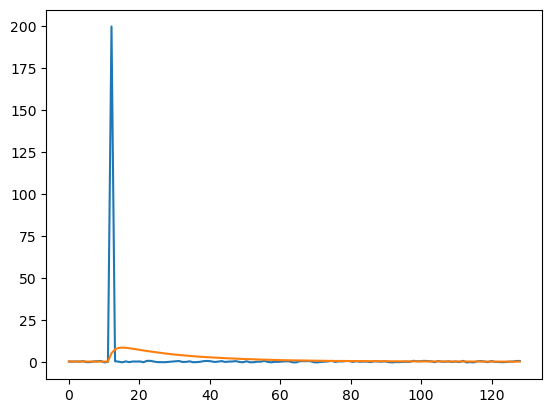

In [2]:
coeff = [0.5, 0.05]
npts=128
x=np.linspace(0,npts,npts)
(ph,n) = seed_photons(npts,1,1)

plt.plot(x,ph)
def adc_filter(ph,coeff):
    for j in range(2):
        accu = ph[0]
        for i in range(npts):
            accu = accu+ (coeff[j]*(ph[i] - accu))
            ph[i] = accu
    return ph

ph = adc_filter(ph,coeff)

plt.plot(x,ph)

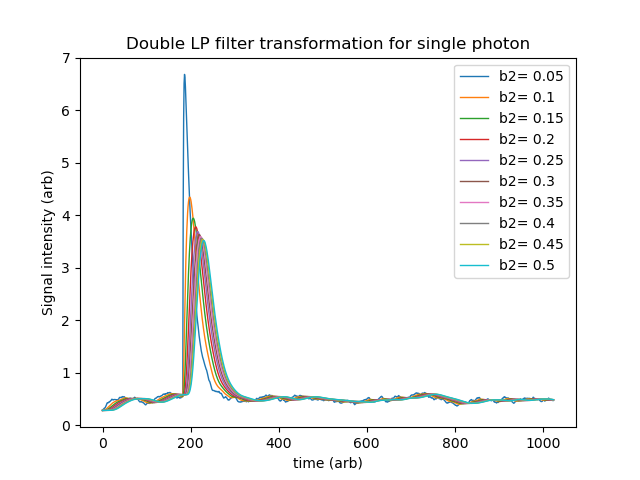

[[5.00000000e-02 6.68675874e+00 1.90483562e+01 1.86000000e+02
  5.20000000e+01 4.00000000e+00]
 [1.00000000e-01 4.34702126e+00 3.47410357e+01 1.98000000e+02
  5.10000000e+01 1.50000000e+01]
 [1.50000000e-01 3.94401598e+00 3.93798194e+01 2.06000000e+02
  5.10000000e+01 1.90000000e+01]
 [2.00000000e-01 3.77923959e+00 4.16017083e+01 2.11000000e+02
  5.10000000e+01 2.10000000e+01]
 [2.50000000e-01 3.69012242e+00 4.28884624e+01 2.16000000e+02
  5.10000000e+01 2.30000000e+01]
 [3.00000000e-01 3.63248790e+00 4.37436224e+01 2.19000000e+02
  5.10000000e+01 2.40000000e+01]
 [3.50000000e-01 3.59227287e+00 4.43535935e+01 2.22000000e+02
  5.10000000e+01 2.40000000e+01]
 [4.00000000e-01 3.56331625e+00 4.48080388e+01 2.25000000e+02
  5.10000000e+01 2.50000000e+01]
 [4.50000000e-01 3.53847644e+00 4.51922274e+01 2.27000000e+02
  5.10000000e+01 2.50000000e+01]
 [5.00000000e-01 3.51931951e+00 4.55014008e+01 2.30000000e+02
  5.00000000e+01 2.60000000e+01]]


In [8]:
import scipy.signal as sc
from mpl_interactions import ioff, panhandler, zoom_factory
%matplotlib widget
npts=1024
x=np.linspace(0,npts,npts)
(ph,n) = seed_photons(npts,1,1)
c = np.array([0.5,0.05])

M = np.ndarray(shape=(10,6))
#plt.plot(x,ph,label='pulse')
with plt.ioff():
    figure, axis = plt.subplots()

for i in range(1,11):
    c_1 =[0,0]
    c_1[0] = c[0]
    c_1[1]=c[1]*i

    signal = adc_filter(ph,c_1)
    plt.plot(x,ph,linewidth=1,label=('b2= '+str('{0:.3g}'.format(0.05*i))),)

    (peak_index, props) = sc.find_peaks(signal,height=2,width=2)
    j = peak_index
    while j> peak_index-1:
        if signal[j]<1:
            t_descent=j-peak_index
            break
        j=j+1
    j = peak_index
    while j< peak_index+1:
        if signal[j]<1:
            t_rise=abs(j-peak_index)
            break
        j=j-1

    M[i-1,0]=round(c_1[1],3)
    M[i-1,1]=props['peak_heights']
    M[i-1,2]=props['widths']
    M[i-1,3]=peak_index
    M[i-1,4]=t_descent
    M[i-1,5] =t_rise



plt.xlabel('time (arb)')
plt.ylabel('Signal intensity (arb)')
plt.title('Double LP filter transformation for single photon')
plt.legend()
disconnect_zoom = zoom_factory(axis)
pan_handler = panhandler(figure)
display(figure.canvas)
print(M)

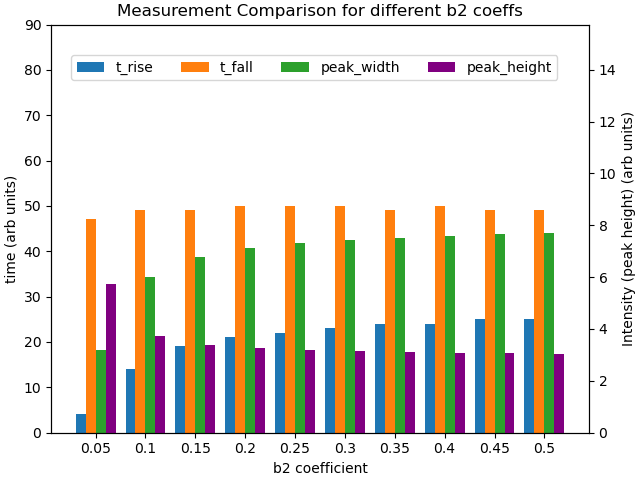

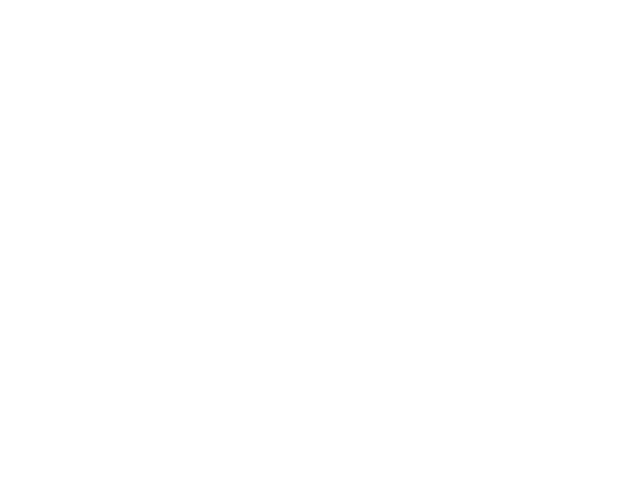

In [4]:
plt.figure()
species = M[:, 0]
penguin_means = {
    't_rise': M[:, 5],
    't_fall': M[:, 4],
    'peak_width': M[:, 2],
    'peak_height': M[:, 1],  # This will be plotted on the secondary y-axis
}

x2 = np.arange(len(species))  # the label locations
bar_width = 0.2  # the width of the bars
multiplier = 0

fig, ax = plt.subplots(layout='constrained')

# Primary y-axis for all attributes except 'peak_height'
for attribute, measurement in penguin_means.items():
    if attribute != 'peak_height':  # Plot only t_rise, t_fall, and peak_width here
        offset = bar_width * multiplier
        rects = ax.bar(x2 + offset, measurement, bar_width, label=attribute)
        multiplier += 1

# Secondary y-axis for 'peak_height'
ax2 = ax.twinx()
offset = bar_width * multiplier
rects = ax2.bar(x2 + offset, penguin_means['peak_height'], bar_width, color='purple', label='peak_height')

# Set y-axis labels
ax.set_xlabel('b2 coefficient')
ax.set_ylabel('time (arb units)')
ax2.set_ylabel('Intensity (peak height) (arb units)')

# Setting x-axis and title
ax.set_title('Measurement Comparison for different b2 coeffs')
ax.set_xticks(x2 + bar_width * (len(penguin_means) - 1) / 2, species)

# Display legends for both axes
fig.legend(loc='upper left', bbox_to_anchor=(0.1, 0.9), ncols=4)

# Set limits as needed
ax.set_ylim(0, 90)
ax2.set_ylim(0, max(penguin_means['peak_height']) + 10)  # Adjust this limit based on peak height

plt.show()


[140]
[2.2269255]
[163]
[1.9455609]
[184]
[1.77822415]
[204]
[1.66236725]
[224]
[1.57590926]
[243]
[1.50814991]
[262]
[1.45321757]
[281]
[1.40752425]
[300]
[1.36871959]
[319]
[1.33520442]


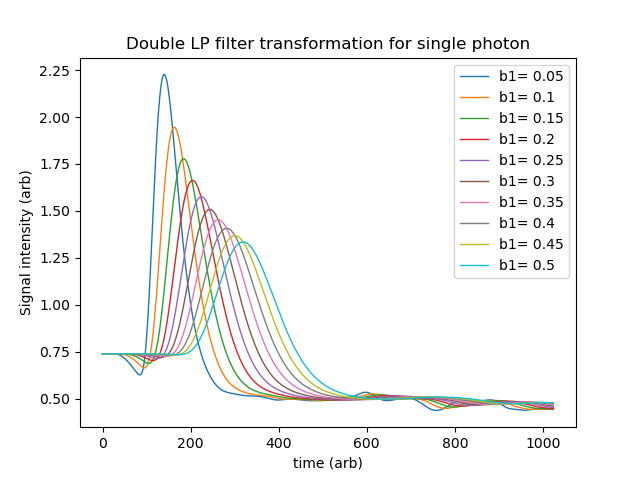

[[8.00000000e-02 2.22692550e+00 6.52222092e+01 1.40000000e+02
  6.10000000e+01 3.60000000e+01]
 [1.60000000e-01 1.94556090e+00 7.76399476e+01 1.63000000e+02
  6.50000000e+01 4.30000000e+01]
 [2.40000000e-01 1.77822415e+00 8.74790434e+01 1.84000000e+02
  6.90000000e+01 4.80000000e+01]
 [3.20000000e-01 1.66236725e+00 9.58928370e+01 2.04000000e+02
  7.10000000e+01 5.20000000e+01]
 [4.00000000e-01 1.57590926e+00 1.03355770e+02 2.24000000e+02
  7.20000000e+01 5.60000000e+01]
 [4.80000000e-01 1.50814991e+00 1.10140268e+02 2.43000000e+02
  7.40000000e+01 5.90000000e+01]
 [5.60000000e-01 1.45321757e+00 1.16419247e+02 2.62000000e+02
  7.50000000e+01 6.20000000e+01]
 [6.40000000e-01 1.40752425e+00 1.22298563e+02 2.81000000e+02
  7.60000000e+01 6.40000000e+01]
 [7.20000000e-01 1.36871959e+00 1.27852707e+02 3.00000000e+02
  7.60000000e+01 6.70000000e+01]
 [8.00000000e-01 1.33520442e+00 1.33135051e+02 3.19000000e+02
  7.60000000e+01 6.90000000e+01]]


In [5]:
import scipy.signal as sc
from mpl_interactions import ioff, panhandler, zoom_factory
%matplotlib widget
#npts=256
#x=np.linspace(0,npts,npts)
#(ph,n) = seed_photons(npts,1,1)
c = np.array([0.08,0.05])

M = np.ndarray(shape=(10,6))
#plt.plot(x,ph,label='pulse')
with plt.ioff():
    figure, axis = plt.subplots()



for i in range(1,11):
    c_1 =[0,0]
    c_1[1] = c[1]
    c_1[0]=c[0]*i

    signal = adc_filter(ph,c_1)
    plt.plot(x,signal,linewidth=1,label=('b1= '+str('{0:.3g}'.format(0.05*i))),)

    (peak_index, props) = sc.find_peaks(signal,height=1,width=2)
    j = peak_index
    print(peak_index)
    print(props['peak_heights'])
    while j>=peak_index:
        if j == npts:
            break
        elif signal[j]<1:
            t_descent=j-peak_index
            break
        j=j+1
    j = peak_index
    while j< peak_index+1:
        if signal[j]<1:
            t_rise=abs(j-peak_index)
            break
        j=j-1

    M[i-1,0]=round(c_1[0],3)
    M[i-1,1]=props['peak_heights']
    M[i-1,2]=props['widths']
    M[i-1,3]=peak_index
    M[i-1,4]=t_descent
    M[i-1,5] =t_rise

plt.xlabel('time (arb)')
plt.ylabel('Signal intensity (arb)')
plt.title('Double LP filter transformation for single photon')
plt.legend()
disconnect_zoom = zoom_factory(axis)
pan_handler = panhandler(figure)
display(figure.canvas)


print(M)

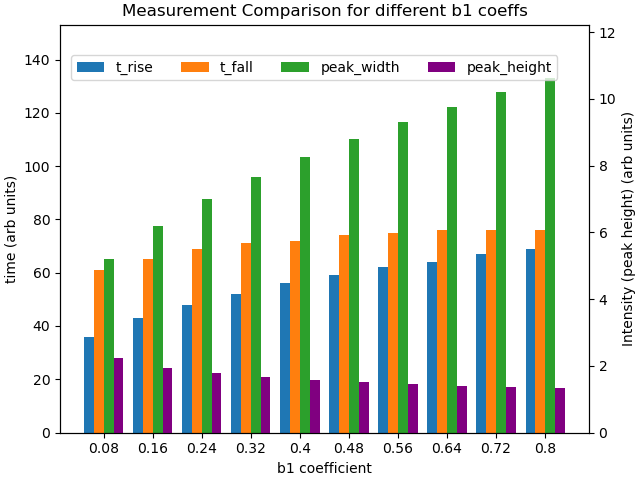

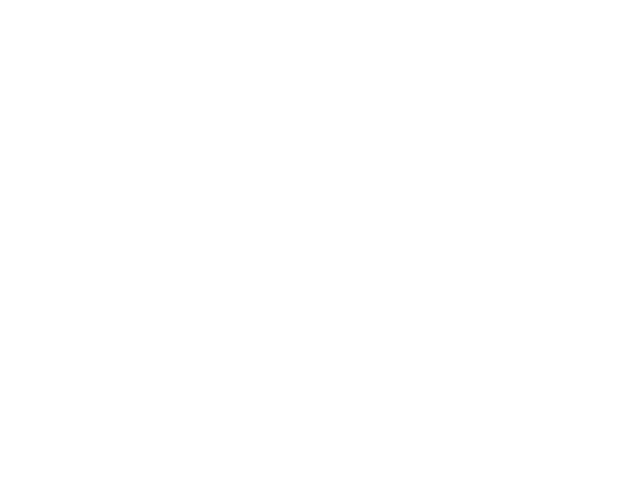

In [7]:
plt.figure()
species = M[:, 0]
penguin_means = {
    't_rise': M[:, 5],
    't_fall': M[:, 4],
    'peak_width': M[:, 2],
    'peak_height': M[:, 1],  # This will be plotted on the secondary y-axis
}

x2 = np.arange(len(species))  # the label locations
bar_width = 0.2  # the width of the bars
multiplier = 0

fig, ax = plt.subplots(layout='constrained')

# Primary y-axis for all attributes except 'peak_height'
for attribute, measurement in penguin_means.items():
    if attribute != 'peak_height':  # Plot only t_rise, t_fall, and peak_width here
        offset = bar_width * multiplier
        rects = ax.bar(x2 + offset, measurement, bar_width, label=attribute)
        multiplier += 1

# Secondary y-axis for 'peak_height'
ax2 = ax.twinx()
offset = bar_width * multiplier
rects = ax2.bar(x2 + offset, penguin_means['peak_height'], bar_width, color='purple', label='peak_height')

# Set y-axis labels
ax.set_xlabel('b1 coefficient')
ax.set_ylabel('time (arb units)')
ax2.set_ylabel('Intensity (peak height) (arb units)')

# Setting x-axis and title
ax.set_title('Measurement Comparison for different b1 coeffs')
ax.set_xticks(x2 + bar_width * (len(penguin_means) - 1) / 2, species)

# Display legends for both axes
fig.legend(loc='upper left', bbox_to_anchor=(0.1, 0.9), ncols=4)

# Set limits as needed
ax.set_ylim(0, max(penguin_means['peak_width'])+20)
ax2.set_ylim(0, max(penguin_means['peak_height']) + 10)  # Adjust this limit based on peak height

plt.show()